<p style="font-size:1.5em; font-style:bold"> Uniform Distribution: MLE and Bootsrap Standard Deviation </p>


In this file, we work on samples from a uniform distribution; that is, $X_1,X_2,\cdots,X_n$~Uniform$(0,\theta)$. It is easy to show that the MLE estimator would be
$$
\hat{\theta}_n = \max_iX_i
$$
The distribution fo $\hat\theta_n$ is
$$
f_{\hat\theta_n}(t) = \frac{n\times t^{n-1}}{\theta^n}
$$
for $t\in[0,\theta]$ and zero otherwise. It is easy to show that
$$
\mathbb{E}_\theta[\hat\theta_n] = \frac{n}{n+1}\theta  \ \ \ \text{and} \ \ \ \text{var}_\theta(\hat\theta_n) = \big(\frac{n}{n+2} - (\frac{n}{n+1})^2\big)\theta^2.
$$
Then the bias of this estimator will be
$$
\text{bias}(\hat\theta_n) = \frac{-\theta}{n+1}
$$
which means the estimator is **biased**. For a fixed $n$, this implies, larger $\theta$ casuese larger bias. In simple words if $\theta$ is large a limited sample of size $n$ will have hard time to get close to this value. On the other hand for a fixed $\theta$ as $n$ gets larger there are more chance of getting the largest smaple closer to $\theta$ and hece the bias decreases.


Finally the Mean Squared Error (MSE) will be

\begin{eqnarray}
\text{MSE}(\hat\theta_n) &=& \text{bias}^2(\hat\theta_n) + \text{var}_\theta(\hat\theta_n)\\
&=&\frac{\theta^2}{(n+1)^2} + \big(\frac{n}{n+2} - (\frac{n}{n+1})^2\big)\theta^2 \\
&=& \big(\frac{1-n^2}{(n+1)^2} + \frac{n}{n+2}\big)\theta^2
\end{eqnarray}

It is easy to show that MSE$(\hat\theta_n)\to 0$ as $n$ grows to $\infty$ and hence this estimator is **consistent**.


<p style="font-size:1.2em; font-style:bold"> Estimating the Variance and Confidence Interval</p>
Once the parameter $\hat\theta_n$ is estimated, we want to form a 95-percentile confidence interval. It will essentially be

$$
(\hat\theta_n - 1.96\times \hat{se}\ ,\  \hat\theta_n + 1.96 \times \hat{se} ).
$$
The exact $\hat{se}$ is the square root of the variance calculated above. Alternatively we can calculate it via bootstrap. Even for bootstrap we can take either a parametric or a non-parameteric approach. In this notebook we study both of the approaches.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set parameters
theta = 1
n = 50
B = 1000 # Bootstrap

In [71]:
# The actual distribution for theta_n
t = np.linspace(0.8,theta,100)
ActualPdf = n*(t**(n-1))/(theta**n)

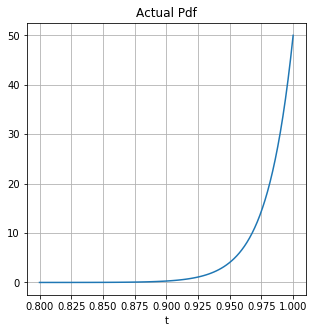

In [72]:
plt.figure(figsize = (5,5))
plt.xlabel('t')
plt.title('Actual Pdf')
plt.grid()
plt.plot(t,ActualPdf)

In [18]:
# Before comparing parameteric and non-parametric with the actual formulae, we need to generate the 50 samples
np.random.seed(seed = 123)
X = np.random.uniform(low = 0, high = theta, size = n)

In [19]:
X.min()

0.05967789660956835

In [20]:
X.max()

0.985559785610705

In [27]:
# Actual Estimate (MLE) is
theta_n = X.max()
print("The MLE estimate for \u03B8 is {0:0.4f}.".format(theta_n))

The MLE estimate for θ is 0.9856.


In [35]:
# Actual SE and confidence interval
actual_se = np.sqrt((n/(n+2) - (n/(n+1))**2)*theta_n)
actual_low = max(theta_n - actual_se,0)
# note that we don't know the actual upper bound theta = 1
actual_high = theta_n + actual_se
print("The actual se is {0:0.4f}.".format(actual_se))
print("The actual confidence interval is ({0:0.3f} , {1:0.3f})".format(actual_low,actual_high))


The actual se is 0.0191.
The actual confidence interval is (0.966 , 1.005)


In [48]:
# non-parametric bootstrap is to obtain samples from the existing B times with replacement
Non_param = np.zeros(shape = B)
for i in np.arange(B):
    np.random.seed(seed = 123 + i)
    sample = np.random.choice(X, size = n, replace = True)
    Non_param[i] = max(sample)

In [51]:
# non-parametric bootstrap is to obtain samples from the existing B times with replacement
param  = np.zeros(shape = B)
for i in np.arange(B):
    np.random.seed(seed = 123 + i)
    sample = np.random.uniform(low = 0, high = theta_n , size = n)
    param[i] = max(sample)

In [53]:
nonparam_se = Non_param.std()
nonparam_low = max(theta_n - nonparam_se,0)
# note that we don't know the actual upper bound theta = 1
nonparam_high = theta_n + nonparam_se
print("The Non-parametric se is {0:0.4f}.".format(nonparam_se))
print("The Non-parametric confidence interval is ({0:0.3f} , {1:0.3f})".format(nonparam_low,nonparam_high))

The Non-parametric se is 0.0255.
The Non-parametric confidence interval is (0.960 , 1.011)


In [54]:
param_se = param.std()
param_low = max(theta_n - param_se,0)
# note that we don't know the actual upper bound theta = 1
param_high = theta_n + param_se
print("The parametric se is {0:0.4f}.".format(param_se))
print("The parametric confidence interval is ({0:0.3f} , {1:0.3f})".format(param_low,param_high))

The parametric se is 0.0192.
The parametric confidence interval is (0.966 , 1.005)


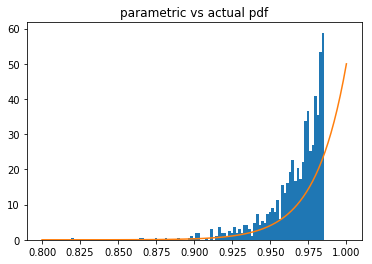

In [77]:
plt.hist(param, bins = 100,  density = True)
plt.plot(t,ActualPdf)
plt.title('parametric vs actual pdf')
plt.show()

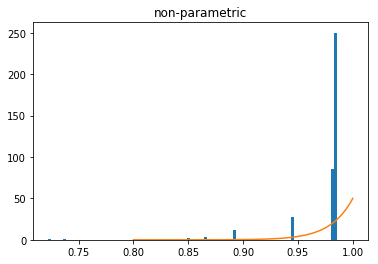

In [78]:
plt.hist(Non_param, bins = 100, density = True)
plt.plot(t,ActualPdf)
plt.title('non-parametric')
plt.show()